2 parts:

1) Lexical semantic analysis:

understands the meaning of the each word

2) Compositional semnatic analysis:

understands how the combinations of words form the meaning


task:

1) word sense disambiguation

undertsands the correct meaning of the words depence of  the context, for example:

rock can refer to a "stone" or a "genre of music"

2) relationship extraction:

identifying varius entities in the sentence and extracting the relationship between them.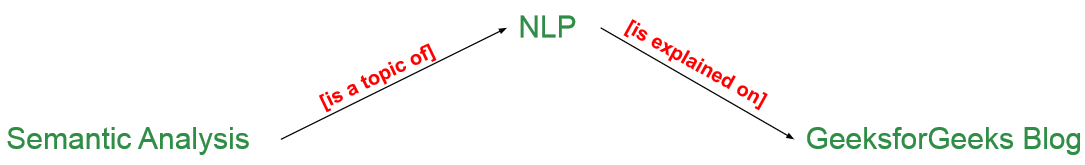

**Elements**:

- Hyponymy - generic term of a word.

        "color" -> "red","blue","green"...

- Homonymy - two or more lexical terms which have spell the same but with different meaning.
        
        "rose" -> "rise in the past" or a "flower"
- synonymy - two or more lexical terms has the same meaning

        large & big, job & occupation

- antonymy - two or more lexical terms has the opposite meaning

        hot & cold, day & night
- polysemy - lexical  term that has mutliple semilar meaning

        "man" -> "human species", "male human", adult male human"
- meronomy - relationship wherin one lexical term is part of a bigger entity

        "wheel" is part of a "vehicle"


In [ ]:
!pip install tqdm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

#preprocessing data(cleaning):

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag

#vectorization(TF-IDF):

from sklearn.feature_extraction.text import TfidfVectorizer

#train:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#evaluation:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


##Data

-preprocessing:

    Lowercasting, remove punctuation(,.: is a the)
    tokenization (i love it -> i, love, it)

###df

##### social media

In [ ]:
!curl -L -o /content/sentiment-analysis-dataset_2.zip\
  https://www.kaggle.com/api/v1/datasets/download/kashishparmar02/social-media-sentiments-analysis-dataset
!unzip /content/sentiment-analysis-dataset_2.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 52147  100 52147    0     0  58610      0 --:--:-- --:--:-- --:--:-- 58610
Archive:  /content/sentiment-analysis-dataset_2.zip
  inflating: sentimentdataset.csv    


##### IMDB

In [ ]:
csv_path = "/content/drive/MyDrive/sentiment_analysis/IMDB-Dataset.csv"

df = pd.read_csv(csv_path)
print(df.columns)
filter_df = df.filter(items=['review','sentiment'])
filter_df = filter_df.dropna().reset_index(drop=True)
filtered_y = filter_df.iloc[:,-1]
y_num, classes = pd.factorize(filtered_y)
print(classes)
filter_df.tail()

Index(['review', 'sentiment'], dtype='object')
Index(['positive', 'negative'], dtype='object')


,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


##### small but clean

In [ ]:
!curl -L -o /content/sentiment-analysis-dataset_3.zip\
  https://www.kaggle.com/api/v1/datasets/download/mdismielhossenabir/sentiment-analysis


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 14603  100 14603    0     0  28060      0 --:--:-- --:--:-- --:--:-- 28060


In [ ]:
!unzip -q /content/sentiment-analysis-dataset_3.zip

In [ ]:
csv_path = "/content/sentiment_analysis.csv"

df_small = pd.read_csv(csv_path)
print(df_small.columns)
filter_df_small = df_small.filter(items=['text','sentiment'])
filter_df_small = filter_df_small.dropna().reset_index(drop=True)
filtered_y_small = filter_df_small.iloc[:,-1]
y_num, classes = pd.factorize(filtered_y_small)
print(classes)
filter_df_small.tail()

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')
Index(['positive', 'negative', 'neutral'], dtype='object')


,text,sentiment
494,"According to , a quarter of families under six...",negative
495,the plan to not spend money is not going well,negative
496,uploading all my bamboozle pictures of facebook,neutral
497,congratulations ! you guys finish a month ear...,positive
498,"actually, I wish I was back in Tahoe. I miss...",negative


##### slang

In [ ]:
!curl -L -o /content/sentiment-analysis-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/abhi8923shriv/sentiment-analysis-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 54.4M  100 54.4M    0     0  63.2M      0 --:--:-- --:--:-- --:--:--  231M


In [ ]:
!unzip /content/sentiment-analysis-dataset.zip

Archive:  /content/sentiment-analysis-dataset.zip
  inflating: test.csv                
  inflating: testdata.manual.2009.06.14.csv  
  inflating: train.csv               
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
csv_path = "/content/train.csv"

df_slang = pd.read_csv(csv_path, encoding="ISO-8859-1")
df_slang = df_slang.dropna().reset_index(drop=True)
print(df.columns)
filter_df_slang = df_slang.filter(items=['selected_text','sentiment'])
filter_df_slang.tail()

Index(['text', 'label', 'label_text'], dtype='object')


,selected_text,sentiment
27475,d lost,negative
27476,", don`t force",negative
27477,Yay good for both of you.,positive
27478,But it was worth it ****.,positive
27479,All this flirting going on - The ATG smiles. Y...,neutral


##### sst-5

In [ ]:
import pandas as pd

splits = {'train': 'train.jsonl', 'validation': 'dev.jsonl', 'test': 'test.jsonl'}
df = pd.read_json("hf://datasets/SetFit/sst5/" + splits['train'], lines=True)
df

,text,label,label_text
0,"a stirring , funny and finally transporting re...",4,very positive
1,apparently reassembled from the cutting-room f...,1,negative
2,they presume their audience wo n't sit still f...,1,negative
3,the entire movie is filled with deja vu moments .,2,neutral
4,this is a visually stunning rumination on love...,3,positive
...,...,...,...
8539,take care is nicely performed by a quintet of ...,1,negative
8540,"the script covers huge , heavy topics in a bla...",1,negative
8541,a seriously bad film with seriously warped log...,1,negative
8542,it 's not too racy and it 's not too offensive .,2,neutral


####processing

In [ ]:
filtered_X = df.iloc[:,0]
filtered_y = df.iloc[:,-2]
y_num, classes = pd.factorize(filtered_y)
sst_5 = {
    0 : 2,
    1 : 0,
    2 : 1,
    3 : 2,
    4 : 0
}

print()
print(len(y_num),classes)
classes = ['negative','neutral', 'positive']
limit = 10_000
X = []
y = []
counter = np.zeros((len(classes)))

for idx in range(len(y_num)):
    y_val = sst_5[y_num[idx]]
    if(counter[y_val] < limit):
      X.append(filtered_X[idx])
      y.append(y_val / (len(classes)-1))
      counter[y_val]+=1
print(counter)
print(len(X))
print(len(y))


8544 Index([4, 1, 2, 3, 0], dtype='int64')
[3310. 1624. 3610.]
8544
8544


In [ ]:
filtered_X = filter_df_slang.iloc[:,0]
filtered_y = filter_df_slang.iloc[:,-1]
y_num, classes = pd.factorize(filtered_y)
slang = {
    0 : 1,
    1 : 0,
    2 : 2,
}

print()
print(len(y_num),classes)
classes = ['negative','neutral', 'positive']

for idx in range(len(y_num)):
    y_val = slang[y_num[idx]]
    if(counter[y_val] < limit):
      X.append(filtered_X[idx])
      y.append(y_val / (len(classes)-1))
      counter[y_val]+=1
print(counter)
print(len(X))
print(len(y))


27480 Index(['neutral', 'negative', 'positive'], dtype='object')
[10000. 10000. 10000.]
30000
30000


In [ ]:
filtered_X = filter_df_small.iloc[:,0]
filtered_y = filter_df_small.iloc[:,-1]
y_num, classes = pd.factorize(filtered_y)
small = {
    0 : 2,
    1 : 0,
    2 : 1,
}

print()
print(len(y_num),classes)
classes = ['negative','neutral', 'positive']

for idx in range(len(y_num)):
    y_val = slang[y_num[idx]]
    X.append(filtered_X[idx])
    y.append(y_val / (len(classes)-1))
    counter[y_val]+=1
print(counter)
print(len(X))
print(len(y))


499 Index(['positive', 'negative', 'neutral'], dtype='object')
[10134. 10166. 10199.]
30499
30499


###clean the data(run)

- lowercasing

- remove links

- remove special characters

         .,@!<

- remove stopword

        is, so, the, a

- tokenization: split into individual words

- lemmatization: reduce words to their root(real dictionary form)

        running -> run,

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default

def lemmatize_words(words):
    tagged = pos_tag(words)  # [('going','VBG'), ('better','JJR'),...]
    lemmas = [
        lemmatizer.lemmatize(word, get_wordnet_pos(tag))
        for word, tag in tagged
    ]
    return lemmas

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
words = ["going", "better", "cats", "feet"]
print(lemmatize_words(words))

['go', 'well', 'cat', 'foot']


In [ ]:
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
print(len(stop_words))

negations = {
    "no","not","nor","don't","didn't","isn't","can't","won't","couldn't",
    "shouldn't","wouldn't","haven't","hasn't","hadn't","ain't","doesn't",
    "aren't", "doesn", "against", "wouldn", "didn", "off"
}

stop_words = stop_words - negations

print(len(stop_words))
print(stop_words)

198
178
{'hadn', 'this', 'or', 'in', 'ma', 'myself', "shan't", 'them', 'by', "that'll", 'do', 'wasn', 'has', "you're", 'doing', "they're", "i'm", 'out', 'just', "we'd", 'again', 'herself', 'once', 'being', 'can', "needn't", 'few', 'those', "she'd", "wasn't", 'did', 'her', 'after', 'won', "it's", 'our', 'very', 'am', 'at', 'between', 'hasn', 'over', "should've", 'does', "weren't", 'o', 'while', "we'll", 'him', "he's", 'here', 'where', 'the', 'mightn', 'above', 'been', "it'd", 'but', 'it', 'own', "they'll", 'ourselves', 'we', 'ours', "they've", 'me', 'if', 'having', 'are', 'whom', "we've", 'aren', "i've", 'such', 'yours', 'so', 'all', 'now', 'your', "he'll", 're', 'were', 'i', 'about', 'further', "he'd", 'which', 'both', 'd', 'on', "you've", 'yourself', "i'd", 'will', "we're", 'theirs', 'during', 'up', 'each', 'below', 'm', 'isn', "i'll", 'don', 'should', 'some', 'there', 's', 'its', 'haven', 'down', 'weren', 'why', 'their', 'couldn', 'from', 'same', "they'd", 'his', 'with', 'other', 'll

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

def preprocessing(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3. Remove usernames/mentions
    text = re.sub(r'@\w+', '', text)

    # 4. Replace long repeated letters ("soooo" → "soo")
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # 5. Remove special characters & numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # 6. Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 7. Tokenize
    words = text.split()

    # 8. Remove stopwords (optional)
    # 9. Lemmatize (convert to root form)

    words = lemmatize_words(words)

    # 10. Rejoin to text
    return ' '.join(words)


In [ ]:
clean_text = []
for text in tqdm(X):
  clean_text.append(preprocessing(text))
print("\n", len(clean_text))

100%|██████████| 30499/30499 [00:21<00:00, 1422.90it/s]


 30499


[10134. 10166. 10199.]


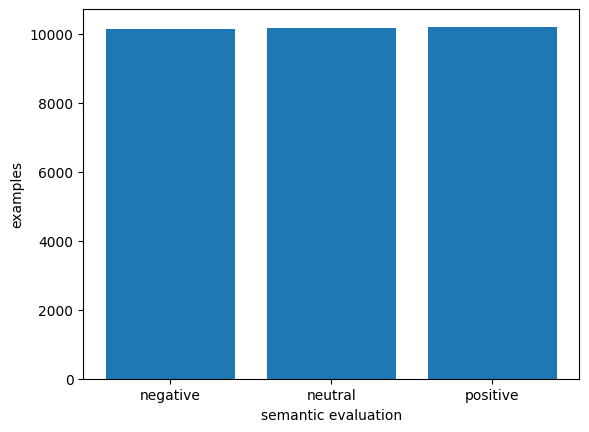

In [ ]:
label = np.zeros(len(classes))
for i in y:
  label[int(i*(len(classes)-1))]+=1
print(label)
plt.bar(classes,label)
plt.xlabel("semantic evaluation")
plt.ylabel("examples")
plt.show()

#starters models

###feature engineering(text vecotization)

- BoW(bag of words):

creates a matrix where each columns is a unique words and rows are sentences, as we count the frequency of each word per sentence

- TF-IDF(Term frequency - Inverse document frequency):

weights the words that counts based on how important they are(less common -> weight more), **which downweight unimportant/common words**

**TF-IDF better for sentiment taks**:

1) reduce noise, the vectors are more informative,less sparse

2) allow the model to learn the actual meaning istead of just counting the words


In [ ]:
tfidf = TfidfVectorizer(
    max_features=9000,    # limit vocabulary size (optional), it drops the rarest words and most common stop words
    ngram_range=(1,2),    # unigrams + bigrams → much better performance
    #stop_words='english'  # remove stopwords if not removed earlier
    min_df = 3,  #drops the words that are include in less than 3 documents
)

X = tfidf.fit_transform(clean_text)


In [ ]:
i = 1
print(clean_text[i])
print((X)[i])


soo sad
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3 stored elements and shape (1, 4836)>
  Coords	Values
  (0, 3800)	0.49886378958922617
  (0, 3539)	0.42641674263429796
  (0, 3811)	0.754522154106711


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

##model

###simple logistic regression

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6857777777777778

Accuracy: 0.6857777777777778


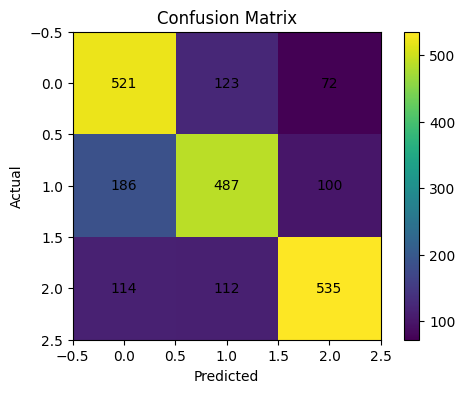


Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       716
           1       0.67      0.63      0.65       773
           2       0.76      0.70      0.73       761

    accuracy                           0.69      2250
   macro avg       0.69      0.69      0.69      2250
weighted avg       0.69      0.69      0.69      2250



In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
sentence = "I love playing bascketball"

clean_s = preprocessing(sentence)
print(clean_s)

X_new = tfidf.transform([clean_s])

prediction = model.predict(X_new)
print("Prediction:", y_uniques[prediction[0]])


love playing bascketball
Prediction: positive


###SVM

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

params = {
    "C": [0.01, 0.1, 1, 10],
    "loss": ["hinge", "squared_hinge"]
}

svm = LinearSVC()
clf = GridSearchCV(svm, params, cv=5, n_jobs=-1, verbose=1)

clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'C': 0.1, 'loss': 'squared_hinge'}


Accuracy: 0.696


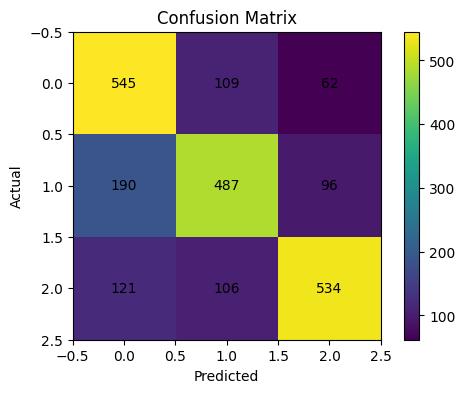


Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.76      0.69       716
           1       0.69      0.63      0.66       773
           2       0.77      0.70      0.74       761

    accuracy                           0.70      2250
   macro avg       0.70      0.70      0.70      2250
weighted avg       0.70      0.70      0.70      2250



In [ ]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [ ]:
sentence = "I love playing bascketball"
sentence = "running"
clean_s = preprocessing(sentence)
print(clean_s)

X_new = tfidf.transform([clean_s])

prediction = clf.predict(X_new)
print("Prediction:", y_uniques[prediction[0]])


running
Prediction: neutral


#deep learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional,SpatialDropout1D, GlobalMaxPooling1D, LayerNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

###tokenization and sequencing:(run)

- tokenization: uses tf tokenizer to create a vocabulary

- sequence conversion: clean sequence -> sequence corresponding integer IDs, base on the vocabulary

- padding: pad all sequence with zeros until the reach maximum length, ensure all input stays the same

In [ ]:
tokens = set()
for t in clean_text:
    tokens.update(t.split())

print("Manual vocab size (sample):", len(tokens))
print(list(tokens)[:20])


Manual vocab size (sample): 20190
['fort', 'sew', 'tanning', 'inxs', 'sloppy', 'fangoria', 'cece', 'nvd', 'cuute', 'puffy', 'neurasthenic', 'beat', 'wh', 'ajc', 'turgid', 'poll', 'rrod', 'circuit', 'unconvincing', 'tax']


In [ ]:
max_word = 0
for text in clean_text:
  max_word = np.maximum(max_word,len(text))
print(max_word)

252


In [ ]:
# -------------------------
# 1. Create and fit Tokenizer
# -------------------------
vocab_size = 12_500   # max number of words to keep
oov_token = "<OOV>"  # token for unknown words
stop_words='english'
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(clean_text)

# View the vocabulary (optional)
print("vocabulary:",len(tokenizer.word_index))
print(tokenizer.word_index)

# -------------------------
# 2. Convert texts → integer sequences
# -------------------------
sequences = tokenizer.texts_to_sequences(clean_text)
print("\nsequences:\n",sequences[:3])

# -------------------------
# 3. Pad sequences to same length
# -------------------------
max_length = 30  # set max token length (adjust as needed)

padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
print("\npadded sequences:\n",padded_sequences[:3])


vocabulary: 20191
{'<OOV>': 1, 'the': 2, 'a': 3, 'be': 4, 'i': 5, 'to': 6, 'and': 7, 'it': 8, 'of': 9, 's': 10, 'in': 11, 'that': 12, 'you': 13, 'have': 14, 'for': 15, 'my': 16, 't': 17, 'but': 18, 'with': 19, 'on': 20, 'this': 21, 'do': 22, 'not': 23, 'so': 24, 'go': 25, 'get': 26, 'good': 27, 'me': 28, 'film': 29, 'movie': 30, 'at': 31, 'an': 32, 'like': 33, 'just': 34, 'm': 35, 'all': 36, 'day': 37, 'one': 38, 'love': 39, 'make': 40, 'out': 41, 'no': 42, 'up': 43, 'can': 44, 'work': 45, 'from': 46, 'about': 47, 'too': 48, 'time': 49, 'what': 50, 'more': 51, 'n': 52, 'well': 53, 'by': 54, 'miss': 55, 'u': 56, 'there': 57, 'if': 58, 'happy': 59, 'see': 60, 'now': 61, 'your': 62, 'will': 63, 'feel': 64, 'we': 65, 'bad': 66, 'or': 67, 'some': 68, 'than': 69, 'look': 70, 'really': 71, 'think': 72, 'much': 73, 'want': 74, 'his': 75, 'know': 76, 'they': 77, 'come': 78, 'great': 79, 'he': 80, 'back': 81, 'today': 82, 'new': 83, 'don': 84, 'fun': 85, 'lol': 86, 'who': 87, 'how': 88, 'take': 

###split(run)

[7593. 7597. 7684.]


[]

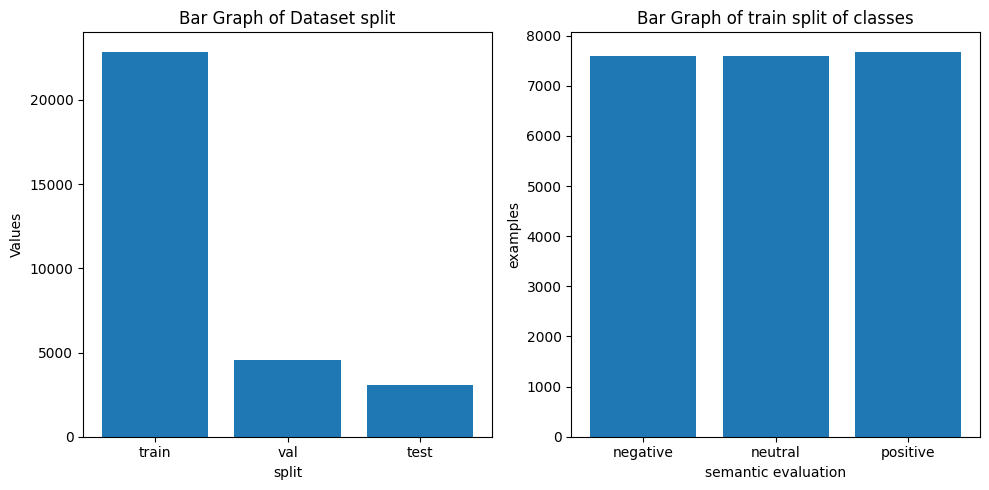

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((padded_sequences, y))
dataset = dataset.shuffle(buffer_size=len(padded_sequences), reshuffle_each_iteration=False)

N = len(padded_sequences)
train_size = int(0.75 * N)
val_size   = int(0.15 * N)
test_size  = N - train_size - val_size

train_ds = dataset.take(train_size)
val_ds   = dataset.skip(train_size).take(val_size)
test_ds  = dataset.skip(train_size + val_size)

train_ds = train_ds.batch(32).prefetch(tf.data.AUTOTUNE)
val_ds   = val_ds.batch(32).prefetch(tf.data.AUTOTUNE)
test_ds  = test_ds.batch(32).prefetch(tf.data.AUTOTUNE)

X_values = ("train","val","test")
y_values = (train_size,val_size,test_size)

fig,axarr = plt.subplots(1,2,figsize=(10,5))

axarr[0].bar(X_values,y_values)

axarr[0].set_xlabel('split')
axarr[0].set_ylabel('Values')
axarr[0].set_title('Bar Graph of Dataset split')

counter = np.zeros(len(classes))
for _,y_batched in train_ds:
  for y_ in y_batched:
    counter[int(y_*(len(classes)-1))]+=1
print(counter)
axarr[1].bar(classes,counter)
axarr[1].set_xlabel('semantic evaluation')
axarr[1].set_ylabel('examples')
axarr[1].set_title('Bar Graph of train split of classes')

plt.tight_layout()
plt.plot()

In [ ]:
reverse_word_index = {v: k for k, v in tokenizer.word_index.items()}
#reverse_word_index[tokenizer.word_index[tokenizer.oov_token]] = '<OOV>'
def reverse_word(sequence):
  words = [(reverse_word_index.get(int(i),'')) for i in sequence]
  sentence = ' '.join(words)
  return sentence

In [ ]:
for x,y in train_ds.take(1):
  sequence = x[0]
print(sequence)
print(y[0])
reverse_word(sequence)

tf.Tensor(
[2282 3926 1031    7 1466  101   27   53 1021   46    2 1031  475    5
   35   20    1    0    0    0    0    0    0    0    0    0    0    0
    0    0], shape=(30,), dtype=int32)
tf.Tensor(1.0, shape=(), dtype=float32)


'twenty cricket beer and sunshine very good well apart from the beer cause i m on <OOV>             '

###model

input layer:

takes padded integer sequence

embedding layer:

convert integer sequence into dence words vectors

recurrect layer(LSTM/GRU):

core of the model

output layer(Dense):

dense layer with as many neuron as output(positive,negative,netural)

###features engeneering(words embedding):

each word is mapped to a dense(continious vector - 100 dimentions), where similar words has similar values

methods:

1) keras embedding layer, the networks learn the vectors from stratch during training, with optimizing to my task

2) use pretrain embedding(Word2Vec/GloVe) and loading them into the embeding layer



In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class Attention(Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )

    def call(self, inputs):
        scores = tf.matmul(inputs, self.W)
        weights = tf.nn.softmax(scores, axis=1)
        return tf.reduce_sum(inputs * weights, axis=1)

class WordDropout(tf.keras.layers.Layer):
    def __init__(self, rate):
        super().__init__()
        self.rate = rate

    def call(self, x, training=None):
        if training:
            mask = tf.random.uniform(tf.shape(x)) > self.rate
            return x * tf.cast(mask, x.dtype)
        return x

In [ ]:
model = tf.keras.Sequential([
    Embedding(vocab_size, 128, input_length=30, trainable=True),
    SpatialDropout1D(0.2),

    Bidirectional(LSTM(64, return_sequences=True)),
    Attention(),
    LayerNormalization(),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=['mae']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_18            │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_12                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_12 (Attention)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_1           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
]


In [ ]:
history = model.fit(
    train_ds,
    epochs=20,
    batch_size=32,
    validation_data=(val_ds),
    callbacks=callbacks
)

Epoch 1/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 78s 85ms/step - loss: 0.1554 - mae: 0.3287 - val_loss: 0.0828 - val_mae: 0.2004
Epoch 2/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 78s 79ms/step - loss: 0.0708 - mae: 0.1784 - val_loss: 0.0781 - val_mae: 0.1780
Epoch 3/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - loss: 0.0485 - mae: 0.1270 - val_loss: 0.0819 - val_mae: 0.1681
Epoch 4/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 56s 78ms/step - loss: 0.0379 - mae: 0.1012 - val_loss: 0.0891 - val_mae: 0.1703
Epoch 5/20
715/715 ━━━━━━━━━━━━━━━━━━━━ 82s 78ms/step - loss: 0.0326 - mae: 0.0860 - val_loss: 0.0900 - val_mae: 0.1702


In [ ]:
model.layers[0].trainable = True
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='mse',
    metrics=['mae']
)
history_2 = model.fit(
    train_ds,
    epochs=20,
    batch_size=32,
    validation_data=(val_ds),
    callbacks=callbacks
)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 31s 73ms/step - loss: 0.0954 - mae: 0.2651 - val_loss: 0.0875 - val_mae: 0.2538
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 91ms/step - loss: 0.0806 - mae: 0.2377 - val_loss: 0.0777 - val_mae: 0.2331
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - loss: 0.0654 - mae: 0.2079 - val_loss: 0.0717 - val_mae: 0.2166
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 72ms/step - loss: 0.0521 - mae: 0.1808 - val_loss: 0.0716 - val_mae: 0.2124
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 74ms/step - loss: 0.0452 - mae: 0.1665 - val_loss: 0.0720 - val_mae: 0.2128
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 75ms/step - loss: 0.0399 - mae: 0.1561 - val_loss: 0.0733 - val_mae: 0.2140
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - loss: 0.0358 - mae: 0.1473 - val_loss: 0.0730 - val_mae: 0.2132


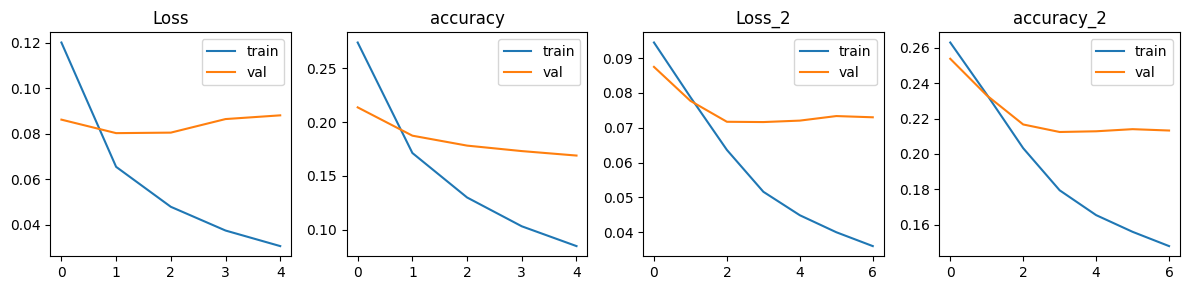

In [ ]:
fig, axarr = plt.subplots(1, 4, figsize=(12, 3))
axarr[0].plot(history.history['loss'])
axarr[0].plot(history.history['val_loss'])
axarr[0].legend(['train', 'val'])
axarr[0].set_title('Loss')
axarr[1].plot(history.history['mae'])
axarr[1].plot(history.history['val_mae'])
axarr[1].legend(['train', 'val'])
axarr[1].set_title('accuracy')
axarr[2].plot(history_2.history['loss'])
axarr[2].plot(history_2.history['val_loss'])
axarr[2].legend(['train', 'val'])
axarr[2].set_title('Loss_2')
axarr[3].plot(history_2.history['mae'])
axarr[3].plot(history_2.history['val_mae'])
axarr[3].legend(['train', 'val'])
axarr[3].set_title('accuracy_2')

plt.tight_layout()
plt.show()

In [ ]:
loaded_model = tf.keras.models.load_model(
    "/content/drive/MyDrive/sentiment_analysis/slang+sst5.h5",
    custom_objects={'Attention': Attention}
    )

TypeError: Error when deserializing class 'Attention' using config={'trainable': True, 'dtype': 'float32'}.

Exception encountered: Attention.__init__() got an unexpected keyword argument 'trainable'

In [ ]:
model.save("/content/drive/MyDrive/sentiment_analysis/slang+sst5+clean_normilized.h5")

96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
Accuracy: 0.7105866928875778


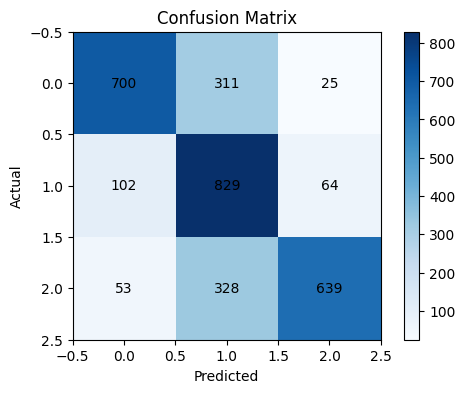


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.68      0.74      1036
           1       0.56      0.83      0.67       995
           2       0.88      0.63      0.73      1020

    accuracy                           0.71      3051
   macro avg       0.75      0.71      0.71      3051
weighted avg       0.76      0.71      0.72      3051



In [ ]:
X_test = tf.concat([x for x, y in test_ds], axis=0)
y_true = tf.concat([y.numpy() for x, y in test_ds], axis=0)

y_pred_probs = model.predict(test_ds)
#y_pred = np.argmax(y_pred_probs, axis=1)


rating = np.round(y_pred_probs * (len(classes)-1)).astype(int)
rating = np.clip(rating, 0, 4)

y_rating = np.round(y_true * (len(classes)-1)).astype(int)
y_rating = np.clip(y_rating, 0, (len(classes)-1))

accuracy = accuracy_score(y_rating, rating)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_rating, rating)

plt.figure(figsize=(6, 4))
plt.imshow(cm,cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()


print("\nClassification Report:\n")
print(classification_report(y_rating, rating))


In [ ]:
sentence = "this is normal"

proccesed_sentence = preprocessing(sentence)
print("proccesed sentence:\n",proccesed_sentence)

tokenized = tokenizer.texts_to_sequences([proccesed_sentence])
print("tokenized:\n",tokenized)

padded_sequences = pad_sequences(tokenized, maxlen=max_length, padding='post', truncating='post')
print("padded token:\n",padded_sequences)

prob = model.predict(padded_sequences)
rating = np.round(prob * (len(classes)-1)).astype(int)
rating = np.clip(rating, 0, (len(classes)-1))
rating = rating.reshape(-1)
print(classes[rating[0]])
print(prob)

proccesed sentence:
 this be normal
tokenized:
 [[21, 4, 2534]]
padded token:
 [[  21    4 2534    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
neutral
[[0.59932494]]


In [ ]:
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

good_id = tokenizer.word_index.get("good")
bad_id = tokenizer.word_index.get("bad")

print("good embedding:", embeddings[good_id][:5])
print("bad embedding:", embeddings[bad_id][:5])

# cosine similarity
from numpy.linalg import norm
cos_sim = np.dot(embeddings[good_id], embeddings[bad_id]) / (
    norm(embeddings[good_id]) * norm(embeddings[bad_id])
)
print("cosine similarity:", cos_sim)


good embedding: [ 0.00030705  0.02215483 -0.0236718  -0.04829577  0.02801138]
bad embedding: [-0.03413473  0.0187284  -0.00378664 -0.01932818  0.04093203]
cosine similarity: 0.06705968


In [ ]:
tests = [
    "good",
    "bad",
    "very good",
    "very bad",
    "not good",
    "not bad",
    "excellent",
    "terrible"
]

for t in tests:
  proccesed_sentence = preprocessing(t)
  tokenized = tokenizer.texts_to_sequences([proccesed_sentence])
  padded_sequences = pad_sequences(tokenized, maxlen=max_length, padding='post', truncating='post')
  pred = model.predict(padded_sequences)
  print(f"{t:12s} → {float(pred[0][0]):.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
good         → 0.281
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
bad          → 0.473
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
very good    → 0.266
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
very bad     → 0.474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
not good     → 0.301
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
not bad      → 0.515
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
excellent    → 0.168
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
terrible     → 0.503


In [ ]:
sen = padded_sequences[0]
print(sen)
print(reverse_word(sen))
prob = model.predict(padded_sequences)
print(prob)
print(len(y))

[61 82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
bad end                                                
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[[0.4757617]]
32


##RNN

##LSTM

##Bidirectional